In [1]:
# data cleaning and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#py lib
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.dates as mdates

In [2]:
austin = pd.read_csv('15minute_data_austin.csv')
initial_data = pd.read_csv('15minute_data_austin.csv')

# only looking at device 661
data661 = initial_data.loc[initial_data['dataid'] == 661]
#
data661['local_15min'] = data661['local_15min'].str[:-3]
data661['local_15min'] = pd.to_datetime(data661['local_15min'])
data661 = data661.dropna(axis=1, how='all')

data661 = data661[['local_15min', 'grid', 'solar', 'leg1v', 'leg2v']]
data661 = data661.sort_values(by="local_15min")
data661 = data661[data661['solar'].notna()]
data661.head(n=5)

/tmp/ipykernel_6427/1185738408.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data661['local_15min'] = data661['local_15min'].str[:-3]
/tmp/ipykernel_6427/1185738408.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data661['local_15min'] = pd.to_datetime(data661['local_15min'])


,local_15min,grid,solar,leg1v,leg2v
422,2018-01-01 01:00:00,1.447,-0.002,NaN,NaN
423,2018-01-01 01:15:00,1.633,-0.002,NaN,NaN
424,2018-01-01 01:30:00,1.410,-0.002,NaN,NaN
425,2018-01-01 01:45:00,1.696,-0.003,NaN,NaN
426,2018-01-01 02:00:00,1.095,-0.006,122.862,123.546


In [3]:
pd.to_datetime('2018-01-01 01:00:00')

Timestamp('2018-01-01 01:00:00')

In [4]:
problem_vals = data661.loc[(data661['local_15min'] >= pd.to_datetime('2018-12-16 00:00:00')) & (data661['local_15min'] < pd.to_datetime('2018-12-18 00:00:00'))]

In [5]:
problem_vals.shape

(192, 5)

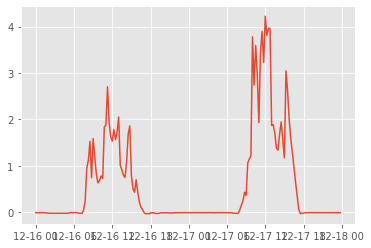

In [8]:
plt.plot(problem_vals['local_15min'], problem_vals['solar'])


In [9]:
problem_vals.dtypes

local_15min    datetime64[ns]
grid                  float64
solar                 float64
leg1v                 float64
leg2v                 float64
dtype: object

In [16]:
problem_vals['local_15min'].iloc[0].minute

0